# A Univariate Time Series Analysis and Forecasting on FRED Unemployment Data with Python

***A little about Time Series***

* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# Importing the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, mean_absolute_error, explained_variance_score

In [2]:
data = pd.read_excel(r"C:\Users\Moriarty\Downloads\fredgraph (2).xls")

In [75]:
data.head()

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Federal Reserve Economic Data,NaN,Red,Market Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Help: https://fred.stlouisfed.org/help-faq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Economic Research Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Federal Reserve Bank of St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing 

In [19]:
data1 = data.iloc[17:]
data1.head(10)

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
17,observation_date,UNRATE,FEDFUNDS,CPIAUCSL,UMCSENT,T10Y2Y,PSAVERT,WILL5000IND,BAMLCC0A0CMTRIV,NaN,observation_date,GDPC1
18,1947-01-01 00:00:00,NaN,NaN,21.48,NaN,NaN,NaN,NaN,NaN,NaN,1947-01-01 00:00:00,2033.06
19,1947-02-01 00:00:00,NaN,NaN,21.62,NaN,NaN,NaN,NaN,NaN,NaN,1947-04-01 00:00:00,2027.64
20,1947-03-01 00:00:00,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,1947-07-01 00:00:00,2023.45
21,1947-04-01 00:00:00,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,1947-10-01 00:00:00,2055.1
22,1947-05-01 00:00:00,NaN,NaN,21.95,NaN,NaN,NaN,NaN,NaN,NaN,1948-01-01 00:00:00,2086.02
23,1947-06-01 00:00:00,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,1948-04-01 00:00:00,2120.45
24,1947-07-01 00:00:00,NaN,NaN,22.23,NaN,NaN,NaN,NaN,NaN,NaN,1948-07-01 00:00:00,2132.6
25,1947-08-01 00:00:00,NaN,NaN,22.4,NaN,NaN,NaN,NaN,NaN,NaN,1948-10-01 00:00:00,2134.98
26,1947-09-01 00:00:00,NaN,NaN,22.84,NaN,NaN,NaN,NaN,NaN,NaN,1949-01-01 00:00:00,2105.56


In [20]:
data1.isna()

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
17,False,False,False,False,False,False,False,False,False,True,False,False
18,False,True,True,False,True,True,True,True,True,True,False,False
19,False,True,True,False,True,True,True,True,True,True,False,False
20,False,True,True,False,True,True,True,True,True,True,False,False
21,False,True,True,False,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
897,False,False,False,False,False,False,False,False,False,True,True,True
898,False,False,False,False,False,False,False,False,False,True,True,True
899,False,False,False,False,False,False,False,False,False,True,True,True
900,False,False,False,True,True,False,True,False,False,True,True,True


In [6]:
data1.tail(10)

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
892,2019-11-01 00:00:00,3.5,1.55,257.824,96.8,0.199474,7.5,147.179,3219.78,NaN,NaN,NaN
893,2019-12-01 00:00:00,3.5,1.55,258.444,99.3,0.249524,7.2,150.865,3243.08,NaN,NaN,NaN
894,2020-01-01 00:00:00,3.6,1.55,258.82,99.8,0.238571,7.6,155.902,3283.41,NaN,NaN,NaN
895,2020-02-01 00:00:00,3.5,1.58,259.05,101,0.173158,8.3,156.203,3339.25,NaN,NaN,NaN
896,2020-03-01 00:00:00,4.4,0.65,257.953,89.1,0.421818,12.8,125.287,3170.07,NaN,NaN,NaN
897,2020-04-01 00:00:00,14.7,0.05,255.902,71.8,0.432857,33.5,130.043,3226.55,NaN,NaN,NaN
898,2020-05-01 00:00:00,13.3,0.05,255.768,72.3,0.5035,24.2,138.599,3284.37,NaN,NaN,NaN
899,2020-06-01 00:00:00,11.1,0.08,257.214,78.1,0.543636,19,148.443,3381.15,NaN,NaN,NaN
900,2020-07-01 00:00:00,10.2,0.09,NaN,NaN,0.475455,NaN,153.653,3468.98,NaN,NaN,NaN
901,2020-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data1.isna().sum()

FRED Graph Observations      0
Unnamed: 1                  13
Black                       91
Economic Indicators          2
Unnamed: 4                 282
Unnamed: 5                 354
Unnamed: 6                 146
Unnamed: 7                 289
Unnamed: 8                 313
Unnamed: 9                 884
Unnamed: 10                590
Unnamed: 11                590
dtype: int64

In [8]:
data1.shape

(884, 12)

In [9]:
data1.columns

Index(['FRED Graph Observations', 'Unnamed: 1', 'Black', 'Economic Indicators',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [21]:
data2 = data1.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)
data2

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 6
17,observation_date,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT
18,1947-01-01 00:00:00,NaN,NaN,21.48,NaN
19,1947-02-01 00:00:00,NaN,NaN,21.62,NaN
20,1947-03-01 00:00:00,NaN,NaN,22,NaN
21,1947-04-01 00:00:00,NaN,NaN,22,NaN
...,...,...,...,...,...
897,2020-04-01 00:00:00,14.7,0.05,255.902,33.5
898,2020-05-01 00:00:00,13.3,0.05,255.768,24.2
899,2020-06-01 00:00:00,11.1,0.08,257.214,19
900,2020-07-01 00:00:00,10.2,0.09,NaN,NaN


In [11]:
data2.shape

(884, 5)

In [12]:
data2.columns

Index(['FRED Graph Observations', 'Unnamed: 1', 'Black', 'Economic Indicators',
       'Unnamed: 6'],
      dtype='object')

In [22]:
data3 = data2.dropna(subset = ['FRED Graph Observations', 'Unnamed: 1', 'Black', 'Economic Indicators',
       'Unnamed: 6'])

In [23]:
data3

,FRED Graph Observations,Unnamed: 1,Black,Economic Indicators,Unnamed: 6
17,observation_date,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT
162,1959-01-01 00:00:00,6,2.48,29.01,11.3
163,1959-02-01 00:00:00,5.9,2.43,29,10.6
164,1959-03-01 00:00:00,5.6,2.8,28.97,10.3
165,1959-04-01 00:00:00,5.2,2.96,28.98,11.2
...,...,...,...,...,...
895,2020-02-01 00:00:00,3.5,1.58,259.05,8.3
896,2020-03-01 00:00:00,4.4,0.65,257.953,12.8
897,2020-04-01 00:00:00,14.7,0.05,255.902,33.5
898,2020-05-01 00:00:00,13.3,0.05,255.768,24.2


In [24]:
data3.shape

(739, 5)

In [16]:
data3.isna().sum()

FRED Graph Observations    0
Unnamed: 1                 0
Black                      0
Economic Indicators        0
Unnamed: 6                 0
dtype: int64

In [25]:
new_header = data3.iloc[0] #grab the first row for the header
data4 = data3[1:] #take the data less the header row
data4.columns = new_header #set the header row as the data4 header
data4

17,observation_date,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT
162,1959-01-01 00:00:00,6,2.48,29.01,11.3
163,1959-02-01 00:00:00,5.9,2.43,29,10.6
164,1959-03-01 00:00:00,5.6,2.8,28.97,10.3
165,1959-04-01 00:00:00,5.2,2.96,28.98,11.2
166,1959-05-01 00:00:00,5.1,2.9,29.04,10.6
...,...,...,...,...,...
895,2020-02-01 00:00:00,3.5,1.58,259.05,8.3
896,2020-03-01 00:00:00,4.4,0.65,257.953,12.8
897,2020-04-01 00:00:00,14.7,0.05,255.902,33.5
898,2020-05-01 00:00:00,13.3,0.05,255.768,24.2


In [26]:
data4['observation_date']

162    1959-01-01 00:00:00
163    1959-02-01 00:00:00
164    1959-03-01 00:00:00
165    1959-04-01 00:00:00
166    1959-05-01 00:00:00
              ...         
895    2020-02-01 00:00:00
896    2020-03-01 00:00:00
897    2020-04-01 00:00:00
898    2020-05-01 00:00:00
899    2020-06-01 00:00:00
Name: observation_date, Length: 738, dtype: object

In [27]:
data4['obs_date'] = [d.date() for d in data4['observation_date']]
data4['obs_time'] = [d.time() for d in data4['observation_date']]

C:\Users\Moriarty\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Moriarty\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data4

17,observation_date,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date,obs_time
162,1959-01-01 00:00:00,6,2.48,29.01,11.3,1959-01-01,00:00:00
163,1959-02-01 00:00:00,5.9,2.43,29,10.6,1959-02-01,00:00:00
164,1959-03-01 00:00:00,5.6,2.8,28.97,10.3,1959-03-01,00:00:00
165,1959-04-01 00:00:00,5.2,2.96,28.98,11.2,1959-04-01,00:00:00
166,1959-05-01 00:00:00,5.1,2.9,29.04,10.6,1959-05-01,00:00:00
...,...,...,...,...,...,...,...
895,2020-02-01 00:00:00,3.5,1.58,259.05,8.3,2020-02-01,00:00:00
896,2020-03-01 00:00:00,4.4,0.65,257.953,12.8,2020-03-01,00:00:00
897,2020-04-01 00:00:00,14.7,0.05,255.902,33.5,2020-04-01,00:00:00
898,2020-05-01 00:00:00,13.3,0.05,255.768,24.2,2020-05-01,00:00:00


In [29]:
data5 = data4.drop(['observation_date'], axis=1)
data5

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date,obs_time
162,6,2.48,29.01,11.3,1959-01-01,00:00:00
163,5.9,2.43,29,10.6,1959-02-01,00:00:00
164,5.6,2.8,28.97,10.3,1959-03-01,00:00:00
165,5.2,2.96,28.98,11.2,1959-04-01,00:00:00
166,5.1,2.9,29.04,10.6,1959-05-01,00:00:00
...,...,...,...,...,...,...
895,3.5,1.58,259.05,8.3,2020-02-01,00:00:00
896,4.4,0.65,257.953,12.8,2020-03-01,00:00:00
897,14.7,0.05,255.902,33.5,2020-04-01,00:00:00
898,13.3,0.05,255.768,24.2,2020-05-01,00:00:00


In [30]:
data5['obs_time'].nunique()

1

In [31]:
data6 = data5.drop(['obs_time'], axis=1)
data6

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date
162,6,2.48,29.01,11.3,1959-01-01
163,5.9,2.43,29,10.6,1959-02-01
164,5.6,2.8,28.97,10.3,1959-03-01
165,5.2,2.96,28.98,11.2,1959-04-01
166,5.1,2.9,29.04,10.6,1959-05-01
...,...,...,...,...,...
895,3.5,1.58,259.05,8.3,2020-02-01
896,4.4,0.65,257.953,12.8,2020-03-01
897,14.7,0.05,255.902,33.5,2020-04-01
898,13.3,0.05,255.768,24.2,2020-05-01


In [32]:
data6.shape

(738, 5)

In [77]:
data6.describe()

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date
count,738.0,738.00,738.00,738.0,738
unique,74.0,461.00,689.00,123.0,738
top,5.4,0.09,29.84,11.7,1982-12-01
freq,32.0,13.00,5.00,20.0,1


In [79]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNRATE    738 non-null    object
 1   FEDFUNDS  738 non-null    object
 2   CPIAUCSL  738 non-null    object
 3   PSAVERT   738 non-null    object
 4   obs_date  738 non-null    object
dtypes: object(5)
memory usage: 29.0+ KB


In [33]:
file_loc = r"C:\Users\Moriarty\Downloads\fredgraph (2).xls"
data7 = pd.read_excel(file_loc, index_col=None, na_values=['NA'], usecols = "L")
print(data7)

    Unnamed: 11
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
..          ...
897         NaN
898         NaN
899         NaN
900         NaN
901         NaN

[902 rows x 1 columns]


In [34]:
data7 = data7.iloc[17:]
data7.head(10)

,Unnamed: 11
17,GDPC1
18,2033.06
19,2027.64
20,2023.45
21,2055.1
22,2086.02
23,2120.45
24,2132.6
25,2134.98
26,2105.56


In [35]:
new_header = data7.iloc[0]
data8 = data7[1:] 
data8.columns = new_header 
data8

17,GDPC1
18,2033.06
19,2027.64
20,2023.45
21,2055.1
22,2086.02
...,...
897,NaN
898,NaN
899,NaN
900,NaN


In [36]:
data8.isna().sum()

17
GDPC1    590
dtype: int64

In [37]:
data8.notna().sum()

17
GDPC1    294
dtype: int64

In [38]:
data8.shape

(884, 1)

In [39]:
data9 = data8.reset_index(drop=True)

In [40]:
data9.head()

17,GDPC1
0,2033.06
1,2027.64
2,2023.45
3,2055.1
4,2086.02


Text(0, 0.5, 'Federal Funds')

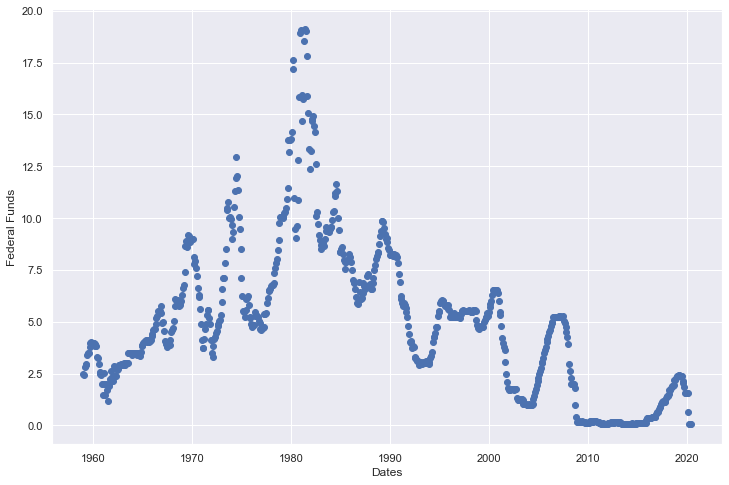

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(data6['obs_date'], data6['FEDFUNDS'])
plt.xlabel('Dates')
plt.ylabel('Federal Funds')

In [44]:
data6 = data6.reset_index(drop=True)
data6.head(2)

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date
0,6,2.48,29.01,11.3,1959-01-01
1,5.9,2.43,29,10.6,1959-02-01


Text(0, 0.5, 'Personal Saving Rate')

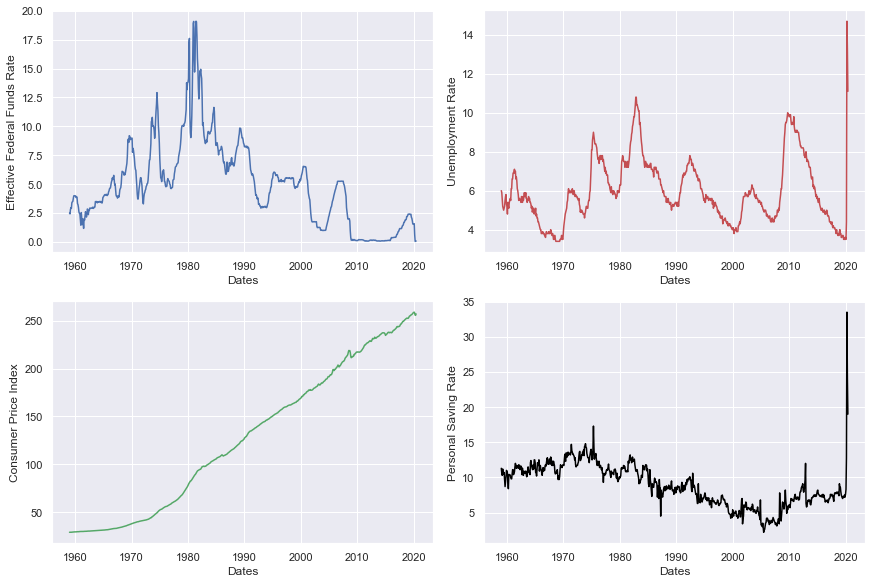

In [55]:
figure, axes = plt.subplots(2,2,figsize=(12,8), constrained_layout=True)
axes[0,0].plot(data6['obs_date'], data6['FEDFUNDS'])
axes[0,0].set_xlabel('Dates')
axes[0,0].set_ylabel('Effective Federal Funds Rate')

axes[0,1].plot(data6['obs_date'], data6['UNRATE'], c='r')
axes[0,1].set_xlabel('Dates')
axes[0,1].set_ylabel('Unemployment Rate')

axes[1,0].plot(data6['obs_date'], data6['CPIAUCSL'], c='g')
axes[1,0].set_xlabel('Dates')
axes[1,0].set_ylabel('Consumer Price Index')

axes[1,1].plot(data6['obs_date'], data6['PSAVERT'], c='black')
axes[1,1].set_xlabel('Dates')
axes[1,1].set_ylabel('Personal Saving Rate')


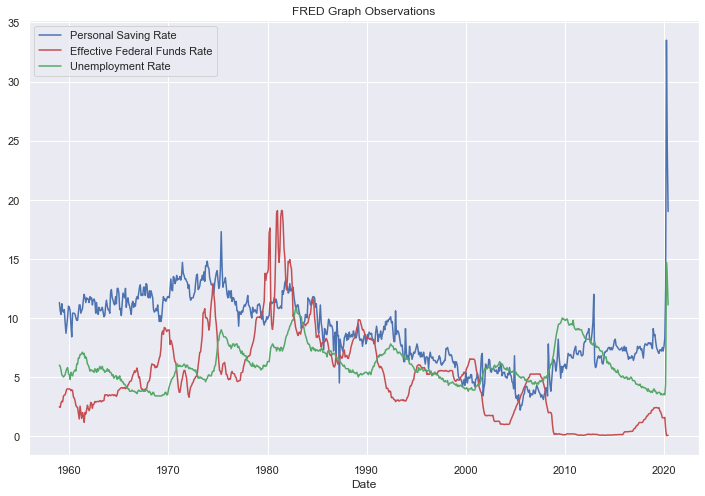

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(data6['obs_date'], data6['PSAVERT'],'b-', label = 'Personal Saving Rate')
plt.plot(data6['obs_date'], data6['FEDFUNDS'],'r-', label = 'Effective Federal Funds Rate')
plt.plot(data6['obs_date'], data6['UNRATE'],'g-', label = 'Unemployment Rate')

plt.xlabel('Date'); plt.title('FRED Graph Observations')
plt.legend();

In [89]:
data11 = data6.set_index(pd.DatetimeIndex(data6['obs_date']))
data11

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT,obs_date
obs_date,,,,,
1959-01-01,6,2.48,29.01,11.3,1959-01-01
1959-02-01,5.9,2.43,29,10.6,1959-02-01
1959-03-01,5.6,2.8,28.97,10.3,1959-03-01
1959-04-01,5.2,2.96,28.98,11.2,1959-04-01
1959-05-01,5.1,2.9,29.04,10.6,1959-05-01
...,...,...,...,...,...
2020-02-01,3.5,1.58,259.05,8.3,2020-02-01
2020-03-01,4.4,0.65,257.953,12.8,2020-03-01
2020-04-01,14.7,0.05,255.902,33.5,2020-04-01


(array([171., 127., 193.,  94.,  81.,  39.,  10.,  11.,   5.,   7.]),
 array([0.05, 1.955, 3.86, 5.765, 7.67, 9.575000000000001, 11.48,
        13.385000000000002, 15.290000000000001, 17.195, 19.1], dtype=object),
 <a list of 10 Patch objects>)

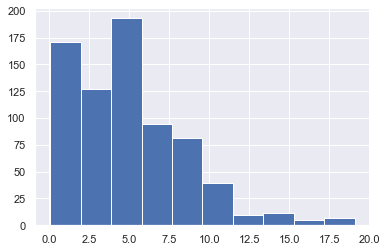

In [64]:
plt.hist(data11['FEDFUNDS'])

In [90]:
data11.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='obs_date', length=738, freq=None)

In [94]:
data12 = data11.drop(['obs_date'], axis=1)
data12

17,UNRATE,FEDFUNDS,CPIAUCSL,PSAVERT
obs_date,,,,
1959-01-01,6,2.48,29.01,11.3
1959-02-01,5.9,2.43,29,10.6
1959-03-01,5.6,2.8,28.97,10.3
1959-04-01,5.2,2.96,28.98,11.2
1959-05-01,5.1,2.9,29.04,10.6
...,...,...,...,...
2020-02-01,3.5,1.58,259.05,8.3
2020-03-01,4.4,0.65,257.953,12.8
2020-04-01,14.7,0.05,255.902,33.5


In [105]:
data13 = data12.groupby('obs_date')['UNRATE'].sum().reset_index()
data13 = data13.set_index(pd.DatetimeIndex(data13['obs_date']))

In [98]:
print(data12.index.min())
print(data12.index.max())

1959-01-01 00:00:00
2020-06-01 00:00:00


In [128]:

# average the unemployment rate for each month 
# use start of each month as the timestamp
y = data13['UNRATE'].resample('MS').mean()
y['2019':]

obs_date
2019-01-01     4.0
2019-02-01     3.8
2019-03-01     3.8
2019-04-01     3.6
2019-05-01     3.6
2019-06-01     3.7
2019-07-01     3.7
2019-08-01     3.7
2019-09-01     3.5
2019-10-01     3.6
2019-11-01     3.5
2019-12-01     3.5
2020-01-01     3.6
2020-02-01     3.5
2020-03-01     4.4
2020-04-01    14.7
2020-05-01    13.3
2020-06-01    11.1
Freq: MS, Name: UNRATE, dtype: float64

***Time-series decompositon***

It allows us to decompose our time series into three distinct components

* Trend
* Seasonality
* Noise

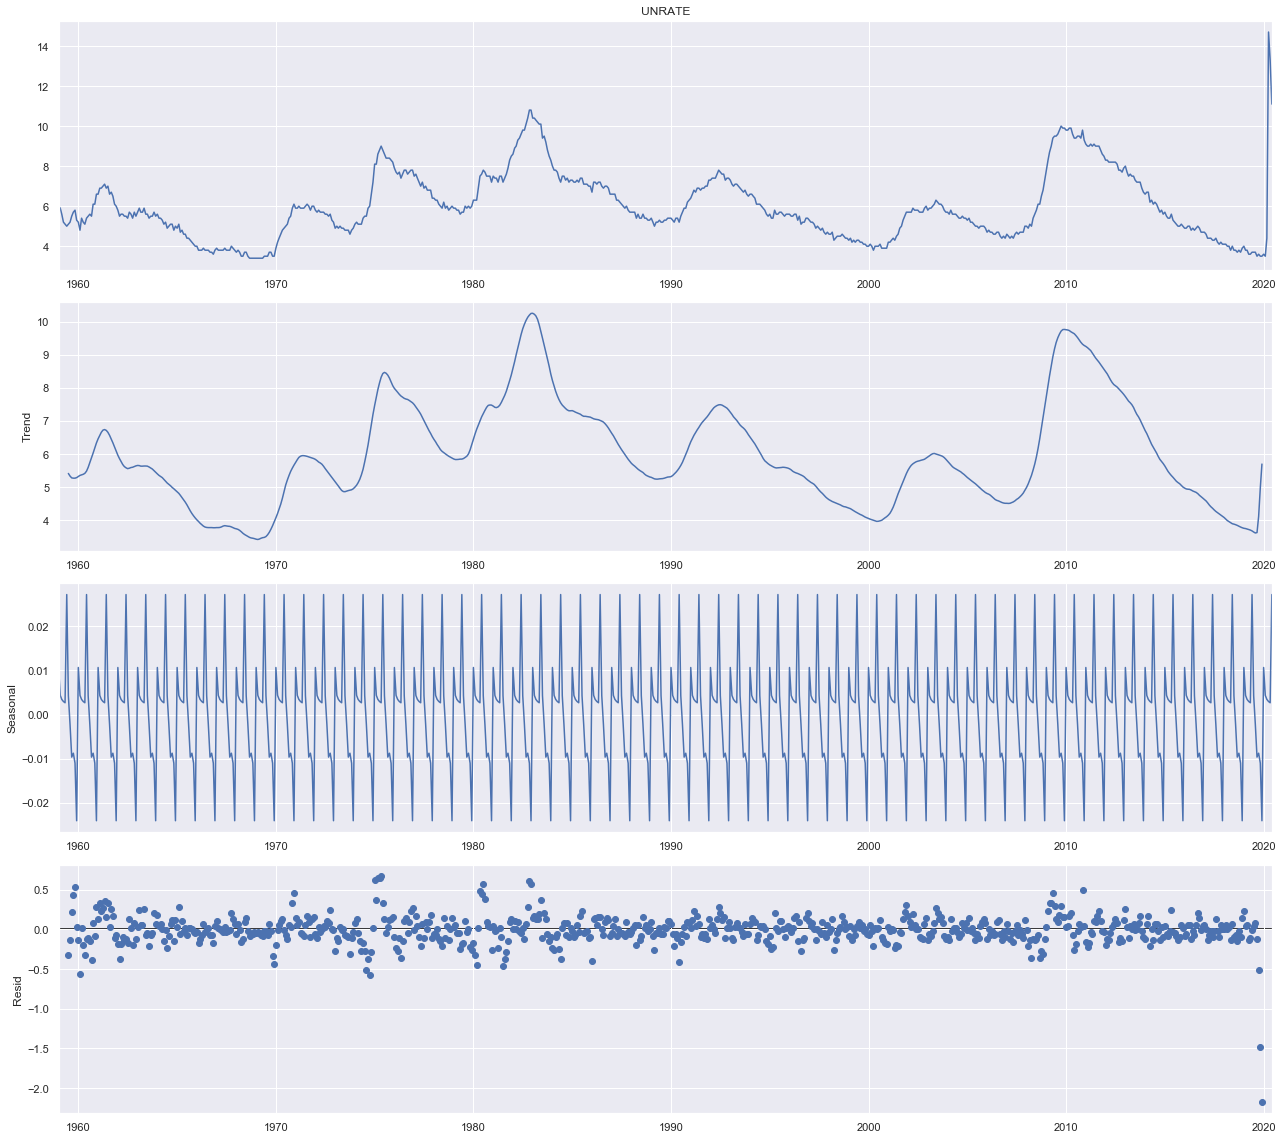

In [127]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 16

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA model

***A Little about Arima Model***

* ARIMA stands for Autoregressive Integreted Moving Average
* ARIMA models are denoted with the notation ARIMA(p, d, q)
* These three parameters account for seasonality, trend, and noise in data

In [113]:
import itertools

# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [114]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4790.233539308912
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3944.183504880424
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2332.391744632212
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2309.367690507126
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2406.285098690814
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2382.3986601164997
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2315.382588367168
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2310.1362105583567
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3800.9010548807564
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3019.896306205962
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1685.543565994055
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1684.3796982430572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1745.2898767128293
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1743.892126770787
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1685.172734060414
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1685.1790270670704
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:853.1650365371537
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:849.2054383739692
ARIM

C:\Users\Moriarty\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:941.6453466687344
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:937.4513305265664
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:882.7061398820896
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:863.9236751690154
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:859.6378070444051
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:991.2953520261835
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:883.0756424226843
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:861.5214910047221


C:\Users\Moriarty\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:981.7196216691333
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:937.2051551162349
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:884.0838011450401
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:855.1585277581394
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:851.1528966749066
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1002.0396228106631
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:888.7769467729574
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:852.9505216703199
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:846.0407435658943
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:943.9337136704519
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:889.1612331300383


C:\Users\Moriarty\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:851.8486488461468
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:847.7989593089659
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:989.8666454665535
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:885.828280831576
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:849.6385805249698
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:842.6636751481931
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:936.7182965619495
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:886.1830821765041


In [115]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

C:\Users\Moriarty\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9312      0.070    -13.303      0.000      -1.068      -0.794
ma.L1          0.9946      0.067     14.901      0.000       0.864       1.125
ar.S.L12      -0.4971      0.105     -4.722      0.000      -0.703      -0.291
sigma2         0.2093      0.001    154.861      0.000       0.207       0.212


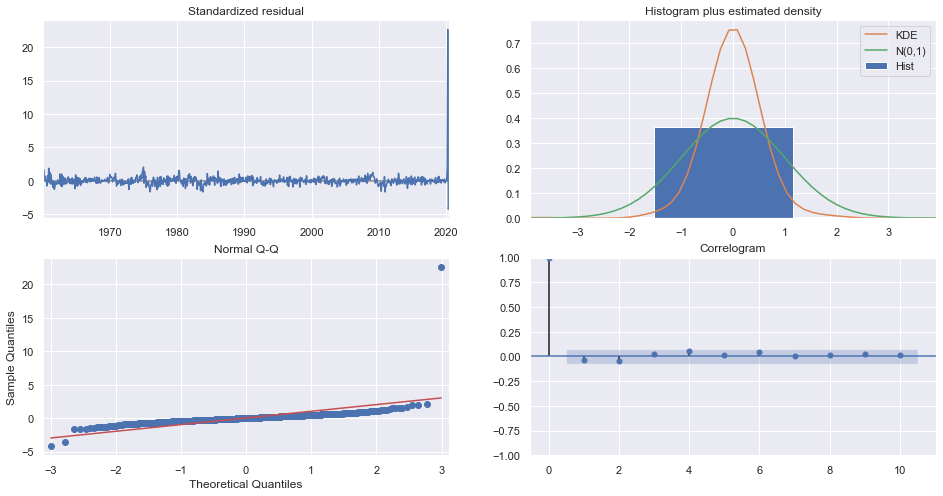

In [116]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()


It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.


### Validating Forecasts


To help us understand the accuracy of our forecasts, we compare predicted rates to real rates of the time series, and we set forecasts to start at 2019–01–01 to the end of the data.

In [120]:
prediction = result.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower UNRATE,upper UNRATE
obs_date,,
2019-01-01,3.078911,4.872279
2019-02-01,2.984755,4.778123
2019-03-01,2.812554,4.605922
2019-04-01,2.854172,4.647540
2019-05-01,2.638945,4.432313
2019-06-01,2.724544,4.517912
2019-07-01,2.735329,4.528696
2019-08-01,2.826993,4.620361
2019-09-01,2.676348,4.469715


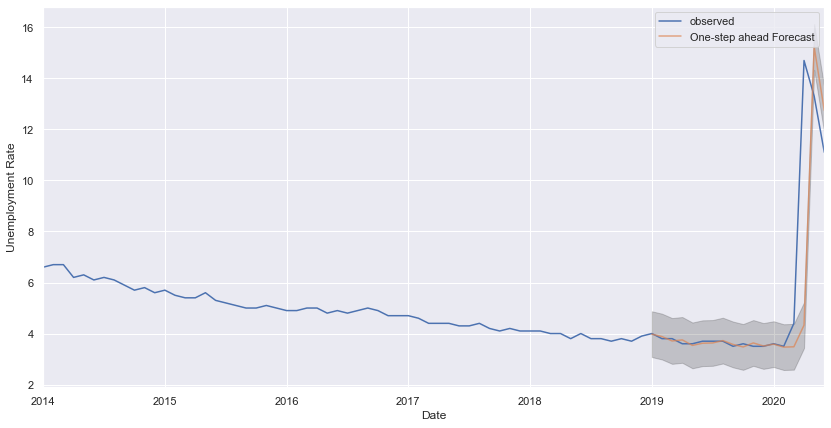

In [122]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Unemployment Rate')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

### Error Analysis

In [123]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 6.38
The Root Mean Squared Error of our forecasts is 2.53


### Producing and visualizing forecasts

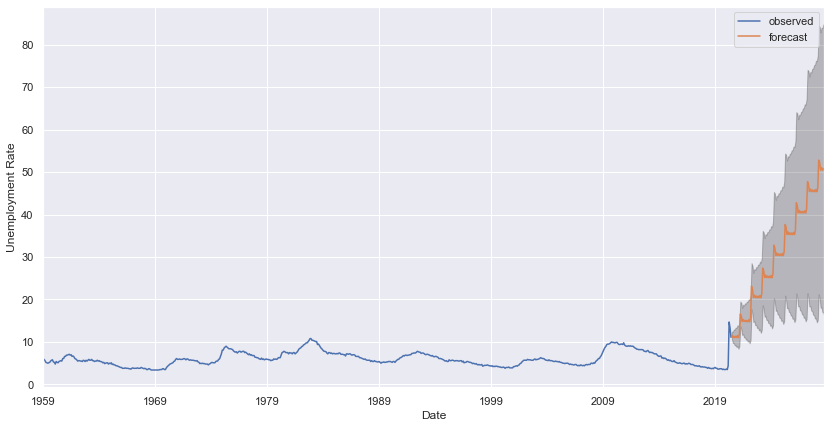

In [124]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')

plt.legend()
plt.show()

### Summary

* Our model clearly captured unemployment rates' seasonality.
* As we forecast further out into the future, it is natural for us to become less confident in our values.
* This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future